# Linear Regression from scratch in Python

## Importing the libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

# Step 1: Load the diabetes dataset
diabetes = load_diabetes()
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target

diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


## Splitting the Data into X and y

In [2]:
# splitting the data into X and y
X = diabetes_df.iloc[:, :-1]
y = diabetes_df.iloc[:, -1]

## Shuffling the data

In [3]:
# shuffling the data
def shuffle(X, y):
    np.random.seed(67)
    randomize = np.arange(len(X))
    np.random.shuffle(randomize)
    X = X.iloc[randomize]
    y = y.iloc[randomize]
    return X, y

X, y = shuffle(X, y)

In [4]:
# make sure that the labels and features are still matching after shuffling the data.
print(pd.DataFrame(X.head()))
print(pd.DataFrame(y.head()))

          age       sex       bmi        bp        s1        s2        s3  \
295 -0.052738  0.050680  0.039062 -0.040099 -0.005697 -0.012900  0.011824   
114  0.023546 -0.044642  0.110198  0.063187  0.013567 -0.032942 -0.024993   
197  0.048974  0.050680  0.003494  0.070072 -0.008449  0.013404 -0.054446   
255  0.001751 -0.044642 -0.065486 -0.005670 -0.007073 -0.019476  0.041277   
429 -0.041840 -0.044642 -0.033151 -0.022885  0.046589  0.041587  0.056003   

           s4        s5        s6  
295 -0.039493  0.016307  0.003064  
114  0.020655  0.099241  0.023775  
197  0.034309  0.013317  0.036201  
255 -0.039493 -0.003301  0.007207  
429 -0.024733 -0.025953 -0.038357  
     target
295    85.0
114   258.0
197   129.0
255   153.0
429    94.0


## Splitting the data into train , dev and test

In [5]:
# Step 2: Split the dataset into train, dev, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

## Choosing the best feature

In [6]:
from sklearn.ensemble import RandomForestRegressor

# choosing the best feature for the model 
def bestFeature(X_train, y_train, X_dev, y_dev):
    # initialize the best feature and its corresponding RMSE
    best_feature = None
    # initialize the best RMSE to infinity
    best_rmse = float('inf')
    
    # loop over all features
    for feature in X_train.columns:
        # train the model on the current feature
        model = RandomForestRegressor()
        model.fit(X_train[feature].values.reshape(-1, 1), y_train)
        # compute the RMSE on the dev set
        y_pred = model.predict(X_dev[feature].values.reshape(-1, 1))
        rmse = np.sqrt(np.mean((y_pred - y_dev) ** 2))
        mse = np.mean((y_pred - y_dev) ** 2)
        # print each feature's MSE and RMSE
        print("RMSE and MSE for feature {}: \t{}, \t{}".format(feature, rmse, mse))
        # get the best feature
        if rmse < best_rmse:
            best_rmse = rmse
            best_feature = feature

    return best_feature, best_rmse

In [7]:
best_feature, best_score = bestFeature(X_train, y_train, X_dev, y_dev)
best_feature, best_score

RMSE and MSE for feature age: 	74.11909245767413, 	5493.639866749247
RMSE and MSE for feature sex: 	71.68464103816397, 	5138.687760770422
RMSE and MSE for feature bmi: 	69.44534268362493, 	4822.6556204460985
RMSE and MSE for feature bp: 	69.46197255531028, 	4824.965631274678
RMSE and MSE for feature s1: 	79.48067459889481, 	6317.177634695403
RMSE and MSE for feature s2: 	83.47639166380381, 	6968.307965208774
RMSE and MSE for feature s3: 	75.06332038001688, 	5634.502066473057
RMSE and MSE for feature s4: 	62.61875669264832, 	3921.108689733089
RMSE and MSE for feature s5: 	70.49735848009135, 	4969.8775526705085
RMSE and MSE for feature s6: 	67.18398922534259, 	4513.688408230949


('s4', 62.61875669264832)

In [8]:
theta = np.array([0.0, 0.0])

In [16]:
def compute_cost(Y_pred, Y_true):
    m = len(Y_true)
    cost = (1/2*m) * np.sum(np.square(Y_pred - Y_true)) # MSE
    return cost


def univariate_linear_regression(theta, input):
    pred = theta[0] + theta[1] * input
    return pred

In [19]:
print(theta.shape)
print(X_train[best_feature].shape)

(2,)
(309,)


The univariate_linear_regression function implements a simple linear regression model with a single feature, where theta is the vector of weights, theta[0] is the intercept and theta[1] is the slope. The input feature input is multiplied by the slope and added to the intercept to obtain the predicted output pred.

In [17]:
def gradient_descent(theta, X, Y_true, Y_pred, learning_rate):
    # calculate the number of samples in the training data
    m = len(Y_true)
    # update theta_0 using gradient descent
    theta[0] = theta[0] - learning_rate * (1/m) * np.sum(Y_pred - Y_true)
    # update theta_1 using gradient descent
    theta[1] = theta[1] - learning_rate * (1/m) * np.sum((Y_pred - Y_true) * X)
    # return the updated theta values
    return theta

# Apply gradient descent to the training data
theta = gradient_descent(theta, X_train[best_feature], y_train, univariate_linear_regression(theta, X_train[best_feature]), 0.01)
theta

array([149.17815371,  33.71364302])

## Normalizing the data

In [11]:
def normalize(X):
    mean = np.mean(X)
    std = np.std(X)
    X = (X - mean) / std
    return X, mean, std

X_train[best_feature], mean, std = normalize(X_train[best_feature])

## Training the model

In [12]:
def train(X, Y_true, theta, learning_rate, iterations):
    # normalize the features of X
    X, X_mean, X_std = normalize(X)
    # initialize an array to store the cost history for each iteration
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        # get the predicted values for Y using the current theta
        Y_pred = univariate_linear_regression(theta, X)
        # update theta using the gradient descent algorithm
        theta = gradient_descent(theta, X, Y_true, Y_pred, learning_rate)
        # store the cost for the current iteration
        cost_history[i] = compute_cost(Y_pred, Y_true)
    # return the updated theta, the cost history, and the normalization parameter
    return theta, cost_history, X_mean, X_std

def predict(X, theta, X_mean, X_std):
    # normalize the features of X using the normalization parameters
    X = (X - X_mean) / X_std
    # get the predicted values for Y using the updated theta
    Y_pred = univariate_linear_regression(theta, X)
    # return the predictions
    return Y_pred

theta, cost_history, X_mean, X_std = train(X_train[best_feature], y_train, theta, 0.01, 1000)
pred = predict(X_test[best_feature], theta, X_mean, X_std)

print("RMSE: ", np.sqrt(np.mean((pred - y_test) ** 2)))
print("MSE: ", np.mean((pred - y_test) ** 2))


RMSE:  83.67893323141489
MSE:  7002.163866747591


In [13]:
compute_cost(pred, y_test)

15716356.798914969

In [14]:
# test the model on the dev set
pred = predict(X_dev[best_feature], theta, X_mean, X_std)
print("RMSE: ", np.sqrt(np.mean((pred - y_dev) ** 2)))
print("MSE: ", np.mean((pred - y_dev) ** 2))

RMSE:  71.39564924684686
MSE:  5097.338731378784


In [15]:
compute_cost(pred, y_dev)

11102003.756943

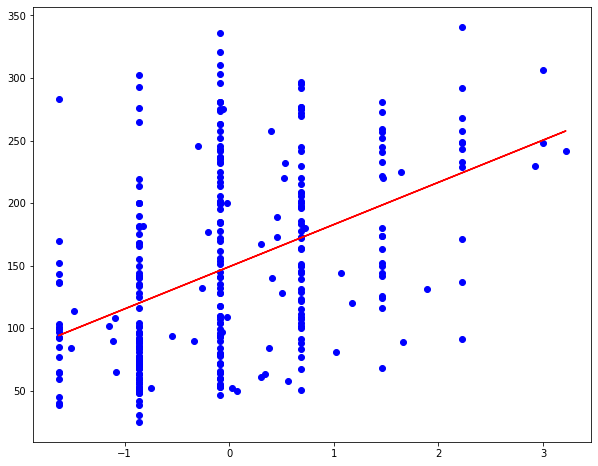

In [16]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(X_train[best_feature], y_train, color='blue')
plt.plot(X_train[best_feature], univariate_linear_regression(theta, X_train[best_feature]), color='red')
plt.show()

.